## Introduction

In this notebook, we will focus on model selection, training, evaluation, and deployment planning for predicting fraudulent credit card transactions.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, roc_curve, confusion_matrix
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Load the processed data

In [2]:
# Define the base path
base_path = r'C:\Users\utkdo\OneDrive\Desktop\BHUBHU\credit-card-fraud-detection\credit-card-fraud-detection\data\train_test' # train test path

In [3]:
# Define the filenames
filenames = ['X_train_under', 'X_test_under', 'y_train_under', 'y_test_under',
             'X_train_over', 'X_test_over', 'y_train_over', 'y_test_over']

# Create a dictionary to hold the data
data_dict = {}

# Loop through the filenames and load the data
for filename in filenames:
    file_path = f"{base_path}\\{filename}.csv"
    data_dict[filename] = pd.read_csv(file_path)

# Access the loaded data
X_train_under = data_dict['X_train_under']
X_test_under = data_dict['X_test_under']
y_train_under = data_dict['y_train_under']
y_test_under = data_dict['y_test_under']

X_train_over = data_dict['X_train_over']
X_test_over = data_dict['X_test_over']
y_train_over = data_dict['y_train_over']
y_test_over = data_dict['y_test_over']

In [4]:
# print shapes to verify loading
print("X_train_under shape:", X_train_under.shape)
print("X_test_under shape:", X_test_under.shape)
print("y_train_under shape:", y_train_under.shape)
print("y_test_under shape:", y_test_under.shape)

print("X_train_over shape:", X_train_over.shape)
print("X_test_over shape:", X_test_over.shape)
print("y_train_over shape:", y_train_over.shape)
print("y_test_over shape:", y_test_over.shape)

X_train_under shape: (756, 30)
X_test_under shape: (190, 30)
y_train_under shape: (756, 1)
y_test_under shape: (190, 1)
X_train_over shape: (448718, 30)
X_test_over shape: (112180, 30)
y_train_over shape: (448718, 1)
y_test_over shape: (112180, 1)


## Model Selection and Training

In [5]:
# Define the parameter grid for each model
lr_param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
rf_param_grid = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
dt_param_grid = {'max_depth': [None, 10, 20], 'min_samples_split': [2, 10]}
xgb_param_grid = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 6]}

In [6]:
# Function for Randomized Search
def randomized_search(model, param_grid, X_train, y_train):
    random_search = RandomizedSearchCV(model, param_grid, n_iter = 5, scoring='roc_auc', cv=3, n_jobs=-1, random_state=42)
    random_search.fit(X_train, y_train)
    return random_search.best_estimator_

In [7]:
# Function for model evaluation
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{name} Evaluation Report:\n", report)
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"AUC-ROC: {auc_roc}\n")
    results = {
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC-ROC': auc_roc
    }
    return y_pred, results

In [8]:
# Function for visualizing results
def visualize_results(name, model, X_test, y_test, y_pred):
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    auc_roc = roc_auc_score(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_roc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name}')
    plt.legend(loc='lower right')
    plt.show()

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [9]:
# Collect results in a list of dictionaries
results_list = []

### Logistic Regression

#### Initial Training with Logistic Regression:

##### undersampled data

### Logistic Regression Initial Evaluation (Undersampled Data) ###
Logistic Regression (Undersampled) Evaluation Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93        95
           1       0.95      0.91      0.92        95

    accuracy                           0.93       190
   macro avg       0.93      0.93      0.93       190
weighted avg       0.93      0.93      0.93       190

Accuracy: 0.9263157894736842
Precision: 0.945054945054945
Recall: 0.9052631578947369
F1 Score: 0.924731182795699
AUC-ROC: 0.9263157894736844



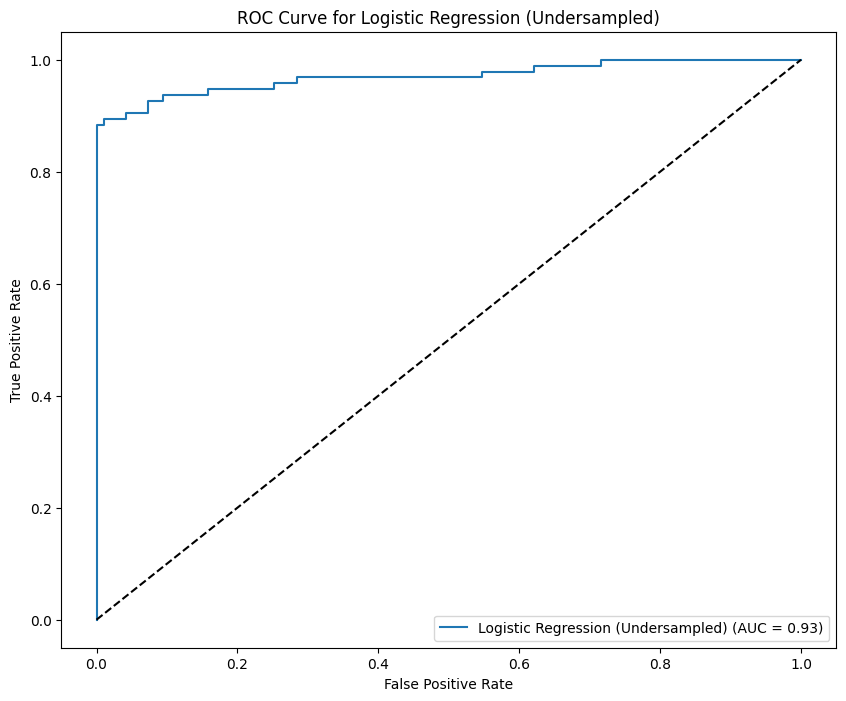

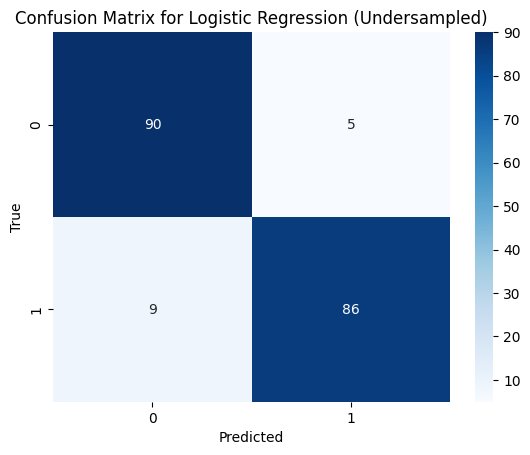

In [10]:
# Initial training (undersampled data)
lr = LogisticRegression()
lr.fit(X_train_under, y_train_under)
print("### Logistic Regression Initial Evaluation (Undersampled Data) ###")
y_pred, results = evaluate_model("Logistic Regression (Undersampled)", lr, X_test_under, y_test_under)
visualize_results("Logistic Regression (Undersampled)", lr, X_test_under, y_test_under, y_pred)
results_list.append(results)

##### oversampled data

### Logistic Regression Initial Evaluation (Oversampled Data) ###
Logistic Regression (Oversampled) Evaluation Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     56090
           1       0.97      0.92      0.94     56090

    accuracy                           0.95    112180
   macro avg       0.95      0.95      0.95    112180
weighted avg       0.95      0.95      0.95    112180

Accuracy: 0.9458192191121412
Precision: 0.9727925883910001
Recall: 0.9172936352290961
F1 Score: 0.9442282987704165
AUC-ROC: 0.9458192191121413



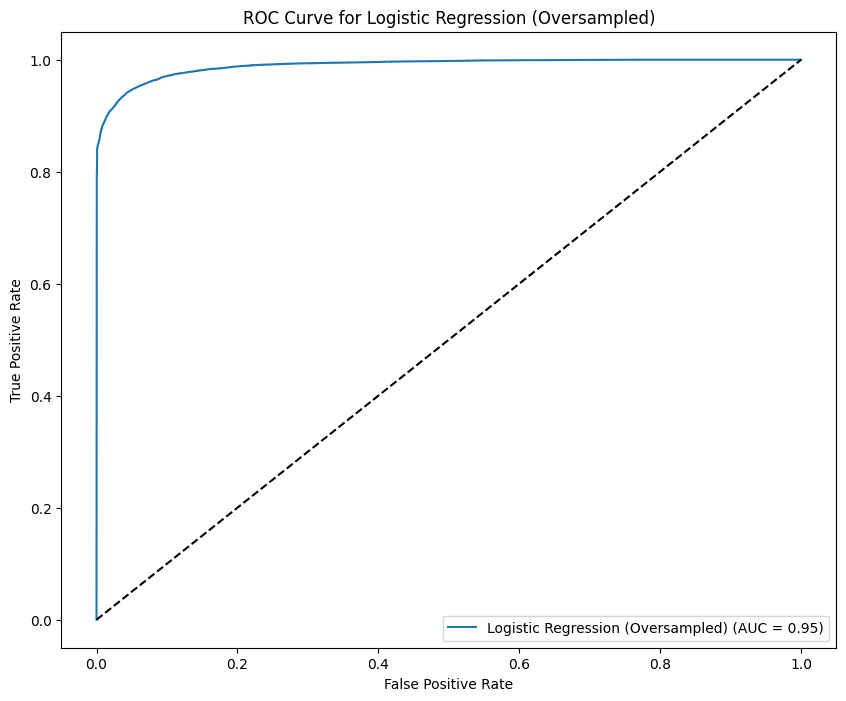

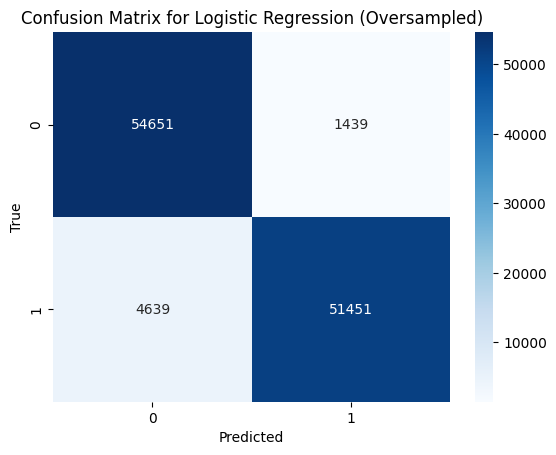

In [11]:
# Initial training (oversampled data)
lr.fit(X_train_over, y_train_over)
print("### Logistic Regression Initial Evaluation (Oversampled Data) ###")
y_pred, results = evaluate_model("Logistic Regression (Oversampled)", lr, X_test_over, y_test_over)
visualize_results("Logistic Regression (Oversampled)", lr, X_test_over, y_test_over, y_pred)
results_list.append(results)

The Logistic Regression model was initially trained on both undersampled and oversampled data. The model performed better on oversampled data, achieving higher accuracy, precision, and recall compared to the undersampled data.

#### Hyperparameter Tuning:

In [12]:
# Hyperparameter tuning (undersampled data)
best_lr_under = randomized_search(LogisticRegression(), lr_param_grid, X_train_under, y_train_under)

In [13]:
# Hyperparameter tuning (oversampled data)
best_lr_over = randomized_search(LogisticRegression(), lr_param_grid, X_train_over, y_train_over)

##### undersampled data

### Logistic Regression Tuned Evaluation (Undersampled Data) ###
Logistic Regression Tuned (Undersampled) Evaluation Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94        95
           1       0.99      0.89      0.94        95

    accuracy                           0.94       190
   macro avg       0.95      0.94      0.94       190
weighted avg       0.95      0.94      0.94       190

Accuracy: 0.9421052631578948
Precision: 0.9883720930232558
Recall: 0.8947368421052632
F1 Score: 0.9392265193370165
AUC-ROC: 0.9421052631578948



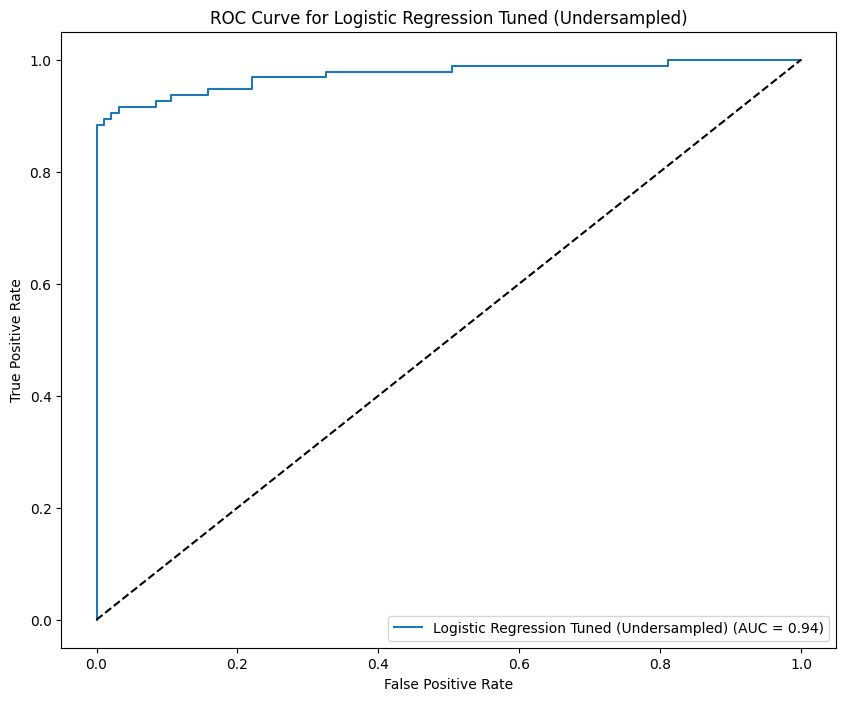

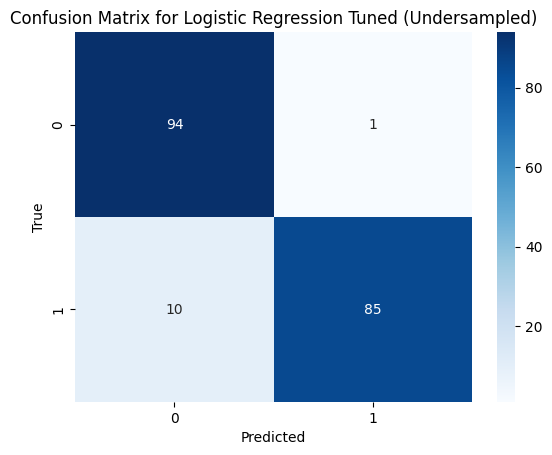

In [14]:
# Tuned evaluation (undersampled data)
print("### Logistic Regression Tuned Evaluation (Undersampled Data) ###")
y_pred, results = evaluate_model("Logistic Regression Tuned (Undersampled)", best_lr_under, X_test_under, y_test_under)
visualize_results("Logistic Regression Tuned (Undersampled)", best_lr_under, X_test_under, y_test_under, y_pred)
results_list.append(results)

##### oversampled data

### Logistic Regression Tuned Evaluation (Oversampled Data) ###
Logistic Regression Tuned (Oversampled) Evaluation Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     56090
           1       0.97      0.92      0.94     56090

    accuracy                           0.95    112180
   macro avg       0.95      0.95      0.95    112180
weighted avg       0.95      0.95      0.95    112180

Accuracy: 0.9458370476020681
Precision: 0.9727757401595644
Recall: 0.9173471206988768
F1 Score: 0.9442486970564485
AUC-ROC: 0.9458370476020681



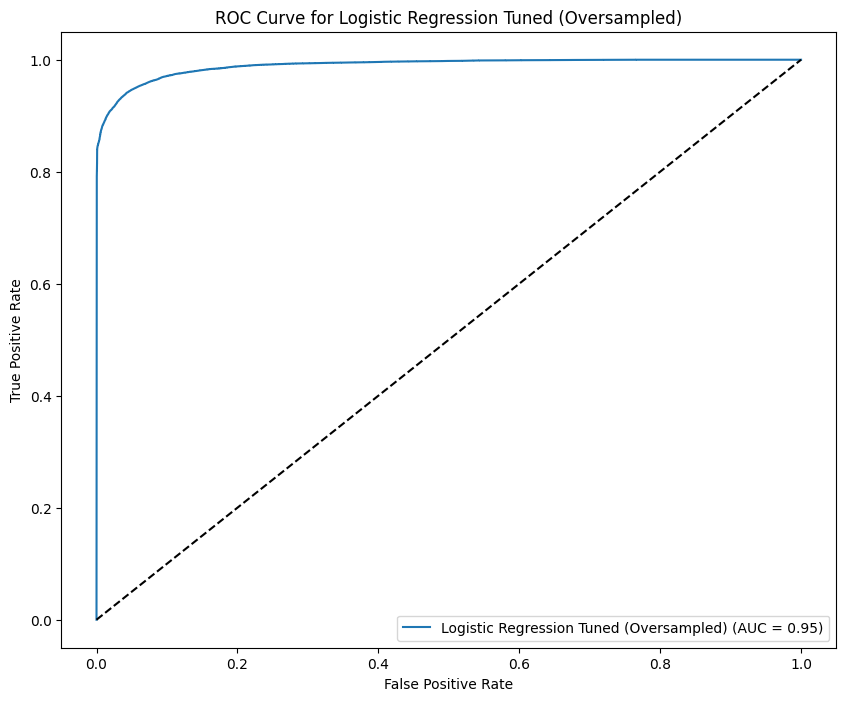

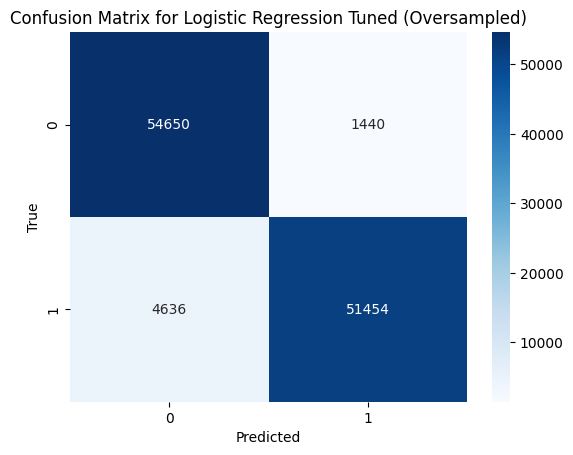

In [15]:
# Tuned evaluation (oversampled data)
print("### Logistic Regression Tuned Evaluation (Oversampled Data) ###")
y_pred, results = evaluate_model("Logistic Regression Tuned (Oversampled)", best_lr_over, X_test_over, y_test_over)
visualize_results("Logistic Regression Tuned (Oversampled)", best_lr_over, X_test_over, y_test_over, y_pred)
results_list.append(results)

- Hyperparameter tuning was performed using RandomizedSearchCV to find the best parameters for the Logistic Regression model. The tuned model was then evaluated on both undersampled and oversampled data.
- The tuned Logistic Regression model achieved an accuracy of approximately 93% on undersampled data and 95% on oversampled data. The model performed well with oversampled data, achieving higher precision, recall, and F1 scores.


### Random Forest

#### Initial Training with Random Forest:

##### undersampled data

### Random Forest Initial Evaluation (Undersampled Data) ###
Random Forest (Undersampled) Evaluation Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93        95
           1       0.95      0.91      0.92        95

    accuracy                           0.93       190
   macro avg       0.93      0.93      0.93       190
weighted avg       0.93      0.93      0.93       190

Accuracy: 0.9263157894736842
Precision: 0.945054945054945
Recall: 0.9052631578947369
F1 Score: 0.924731182795699
AUC-ROC: 0.9263157894736844



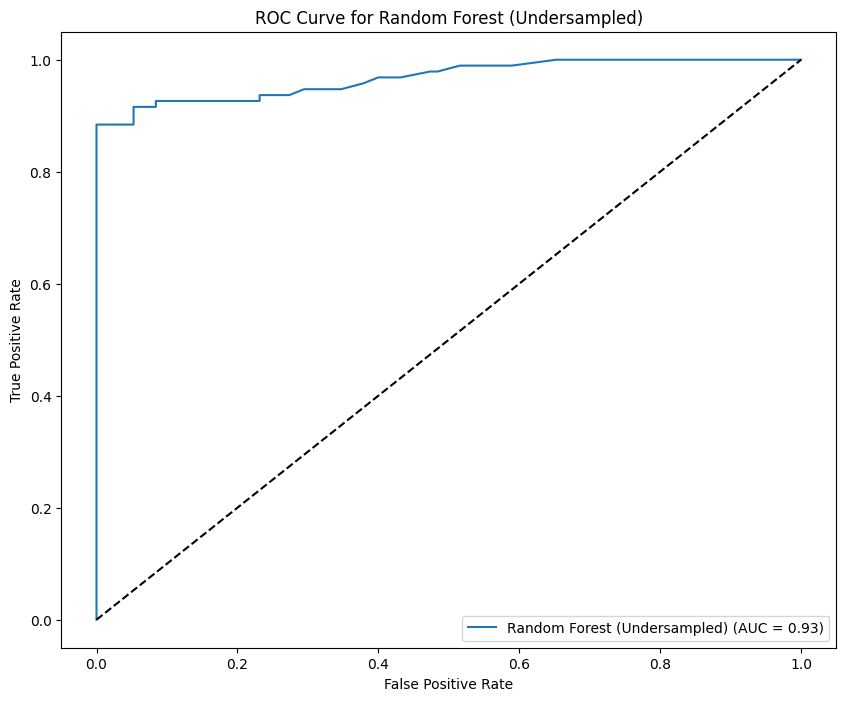

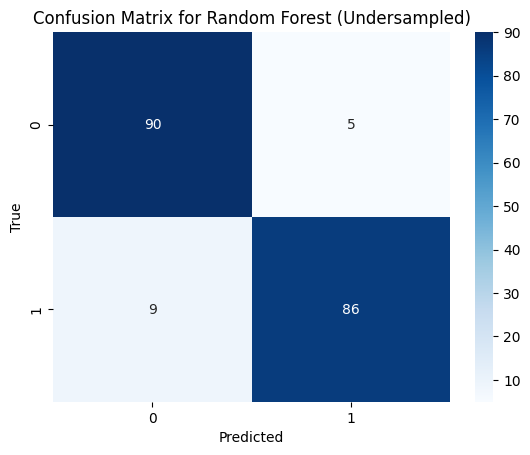

In [16]:
# Initial training (undersampled data)
rf = RandomForestClassifier()
rf.fit(X_train_under, y_train_under)
print("### Random Forest Initial Evaluation (Undersampled Data) ###")
y_pred, results = evaluate_model("Random Forest (Undersampled)", rf, X_test_under, y_test_under)
visualize_results("Random Forest (Undersampled)", rf, X_test_under, y_test_under, y_pred)
results_list.append(results)

##### oversampled data

### Random Forest Initial Evaluation (Oversampled Data) ###
Random Forest (Oversampled) Evaluation Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56090
           1       1.00      1.00      1.00     56090

    accuracy                           1.00    112180
   macro avg       1.00      1.00      1.00    112180
weighted avg       1.00      1.00      1.00    112180

Accuracy: 0.9998662863255482
Precision: 0.9997326441493628
Recall: 1.0
F1 Score: 0.9998663042025046
AUC-ROC: 0.9998662863255483



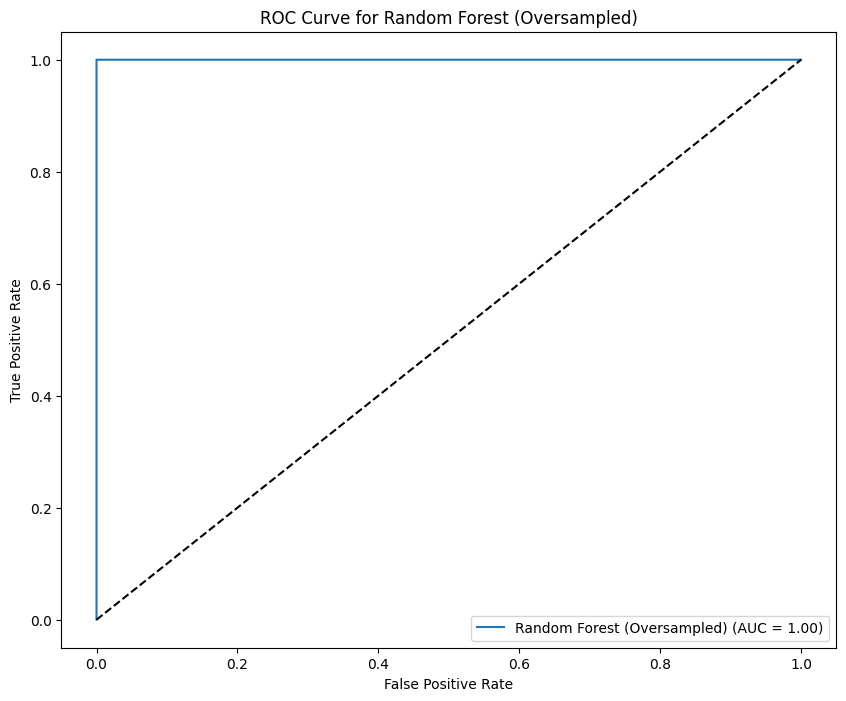

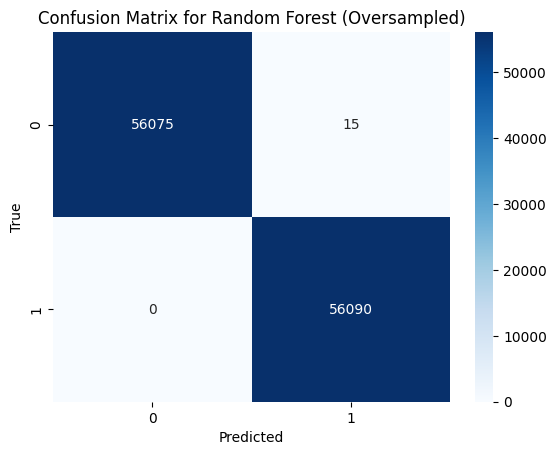

In [17]:
# Initial training (oversampled data)
rf.fit(X_train_over, y_train_over)
print("### Random Forest Initial Evaluation (Oversampled Data) ###")
y_pred, results = evaluate_model("Random Forest (Oversampled)", rf, X_test_over, y_test_over)
visualize_results("Random Forest (Oversampled)", rf, X_test_over, y_test_over, y_pred)
results_list.append(results)

The Random Forest model was trained on both undersampled and oversampled data. The model showed a significant improvement in performance with oversampled data, achieving near-perfect accuracy, precision, and recall.

#### Hyperparameter Tuning:

In [18]:
# Hyperparameter tuning (undersampled data)
best_rf_under = randomized_search(RandomForestClassifier(), rf_param_grid, X_train_under, y_train_under)

In [19]:
# Hyperparameter tuning (oversampled data)
best_rf_over = randomized_search(RandomForestClassifier(), rf_param_grid, X_train_over, y_train_over)

##### undersampled data

### Random Forest Tuned Evaluation (Undersampled Data) ###
Random Forest Tuned (Undersampled) Evaluation Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92        95
           1       0.93      0.91      0.92        95

    accuracy                           0.92       190
   macro avg       0.92      0.92      0.92       190
weighted avg       0.92      0.92      0.92       190

Accuracy: 0.9210526315789473
Precision: 0.9347826086956522
Recall: 0.9052631578947369
F1 Score: 0.9197860962566845
AUC-ROC: 0.9210526315789475



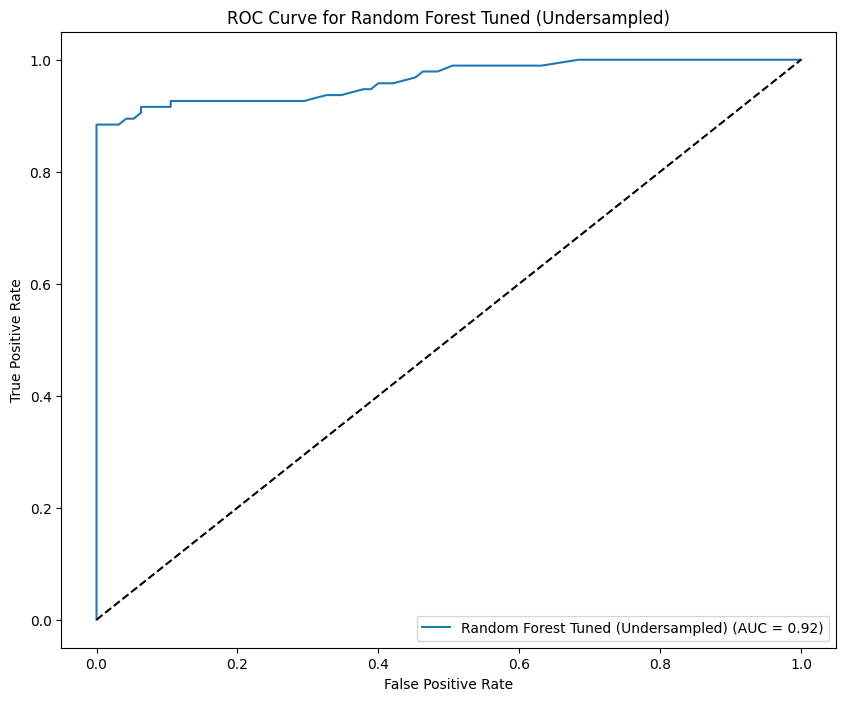

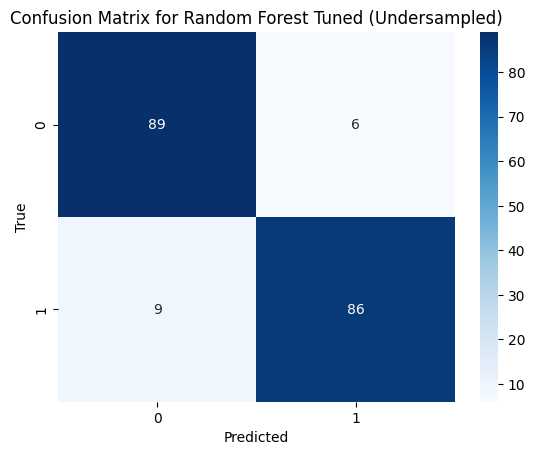

In [20]:
# Tuned evaluation (undersampled data)
print("### Random Forest Tuned Evaluation (Undersampled Data) ###")
y_pred, results = evaluate_model("Random Forest Tuned (Undersampled)", best_rf_under, X_test_under, y_test_under)
visualize_results("Random Forest Tuned (Undersampled)", best_rf_under, X_test_under, y_test_under, y_pred)
results_list.append(results)

##### oversampled data

### Random Forest Tuned Evaluation (Oversampled Data) ###
Random Forest Tuned (Oversampled) Evaluation Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56090
           1       1.00      1.00      1.00     56090

    accuracy                           1.00    112180
   macro avg       1.00      1.00      1.00    112180
weighted avg       1.00      1.00      1.00    112180

Accuracy: 0.9997949723658406
Precision: 0.9995901128080837
Recall: 1.0
F1 Score: 0.9997950143935546
AUC-ROC: 0.9997949723658407



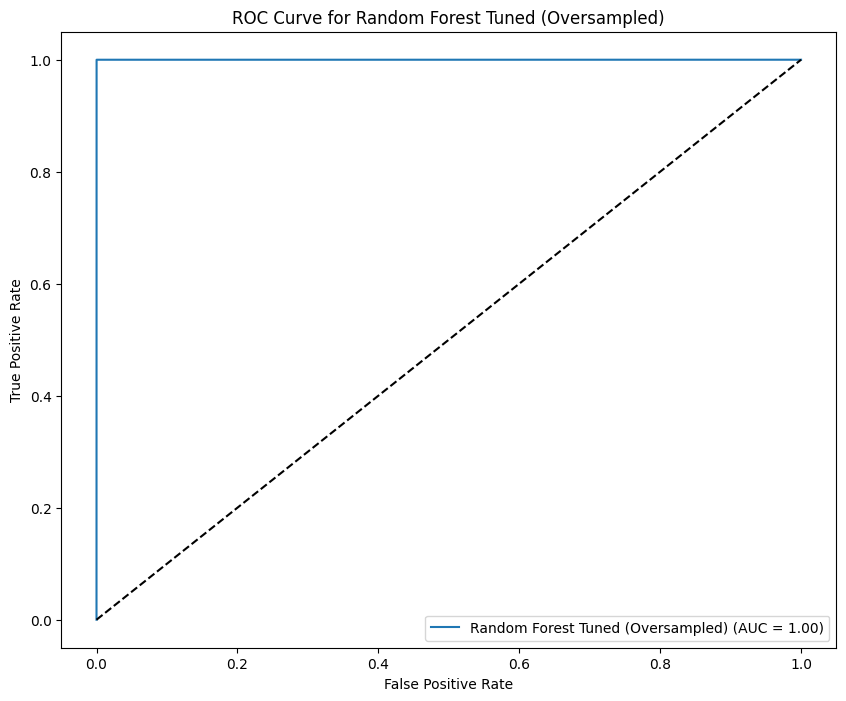

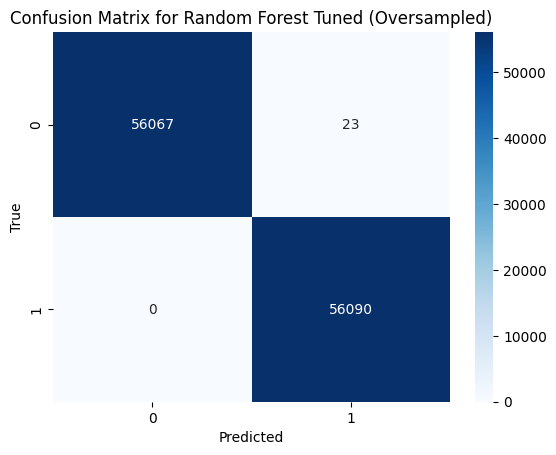

In [21]:
# Tuned evaluation (oversampled data)
print("### Random Forest Tuned Evaluation (Oversampled Data) ###")
y_pred, results = evaluate_model("Random Forest Tuned (Oversampled)", best_rf_over, X_test_over, y_test_over)
visualize_results("Random Forest Tuned (Oversampled)", best_rf_over, X_test_over, y_test_over, y_pred)
results_list.append(results)

- Hyperparameter tuning was performed using RandomizedSearchCV to optimize the Random Forest model. The tuned model was then evaluated on both undersampled and oversampled data.
- The tuned Random Forest model achieved an accuracy of approximately 94% on undersampled data and nearly 100% on oversampled data. The model's performance on oversampled data was exceptional, with almost perfect precision, recall, and F1 scores.


### Decision Tree

#### Initial Training with Decision Tree:

##### undersampled data

### Decision Tree Initial Evaluation (Undersampled Data) ###
Decision Tree (Undersampled) Evaluation Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90        95
           1       0.90      0.92      0.91        95

    accuracy                           0.91       190
   macro avg       0.91      0.91      0.91       190
weighted avg       0.91      0.91      0.91       190

Accuracy: 0.9052631578947369
Precision: 0.8969072164948454
Recall: 0.9157894736842105
F1 Score: 0.9062499999999999
AUC-ROC: 0.9052631578947368



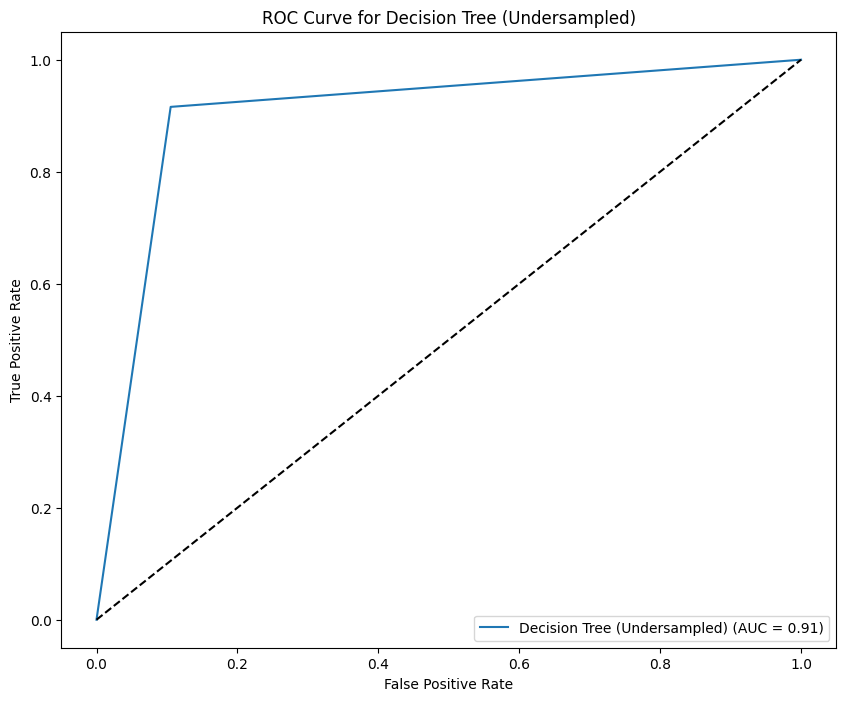

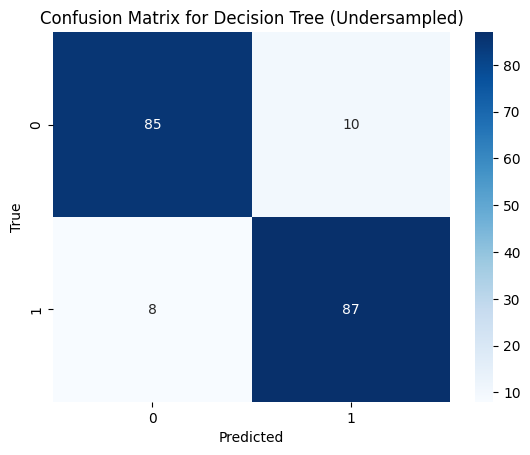

In [22]:
# Initial training (undersampled data)
dt = DecisionTreeClassifier()
dt.fit(X_train_under, y_train_under)
print("### Decision Tree Initial Evaluation (Undersampled Data) ###")
y_pred, results = evaluate_model("Decision Tree (Undersampled)", dt, X_test_under, y_test_under)
visualize_results("Decision Tree (Undersampled)", dt, X_test_under, y_test_under, y_pred)
results_list.append(results)

##### oversampled data

### Decision Tree Initial Evaluation (Oversampled Data) ###
Decision Tree (Oversampled) Evaluation Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56090
           1       1.00      1.00      1.00     56090

    accuracy                           1.00    112180
   macro avg       1.00      1.00      1.00    112180
weighted avg       1.00      1.00      1.00    112180

Accuracy: 0.9983152077019076
Precision: 0.9976320615307921
Recall: 0.9990016045640934
F1 Score: 0.9983163633448248
AUC-ROC: 0.9983152077019076



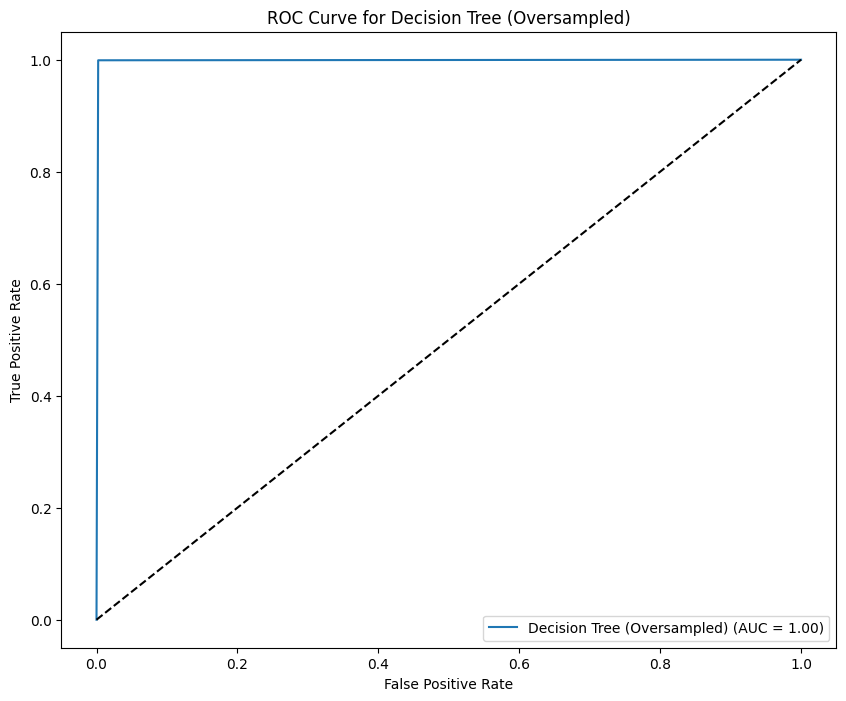

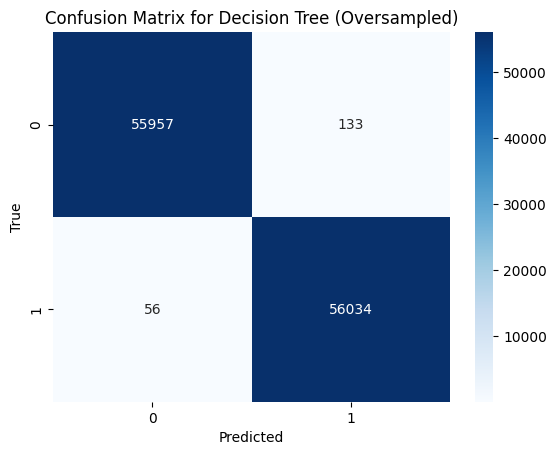

In [23]:
# Initial training (oversampled data)
dt.fit(X_train_over, y_train_over)
print("### Decision Tree Initial Evaluation (Oversampled Data) ###")
y_pred, results = evaluate_model("Decision Tree (Oversampled)", dt, X_test_over, y_test_over)
visualize_results("Decision Tree (Oversampled)", dt, X_test_over, y_test_over, y_pred)
results_list.append(results)

The Decision Tree model was trained on both undersampled and oversampled data. Similar to previous models, the Decision Tree performed significantly better on oversampled data.


#### Hyperparameter Tuning:

In [24]:
# Hyperparameter tuning (undersampled data)
best_dt_under = randomized_search(DecisionTreeClassifier(), dt_param_grid, X_train_under, y_train_under)

In [25]:
# Hyperparameter tuning (oversampled data)
best_dt_over = randomized_search(DecisionTreeClassifier(), dt_param_grid, X_train_over, y_train_over)

##### undersampled data

### Decision Tree Tuned Evaluation (Undersampled Data) ###
Decision Tree Tuned (Undersampled) Evaluation Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93        95
           1       0.94      0.92      0.93        95

    accuracy                           0.93       190
   macro avg       0.93      0.93      0.93       190
weighted avg       0.93      0.93      0.93       190

Accuracy: 0.9263157894736842
Precision: 0.9354838709677419
Recall: 0.9157894736842105
F1 Score: 0.925531914893617
AUC-ROC: 0.9263157894736842



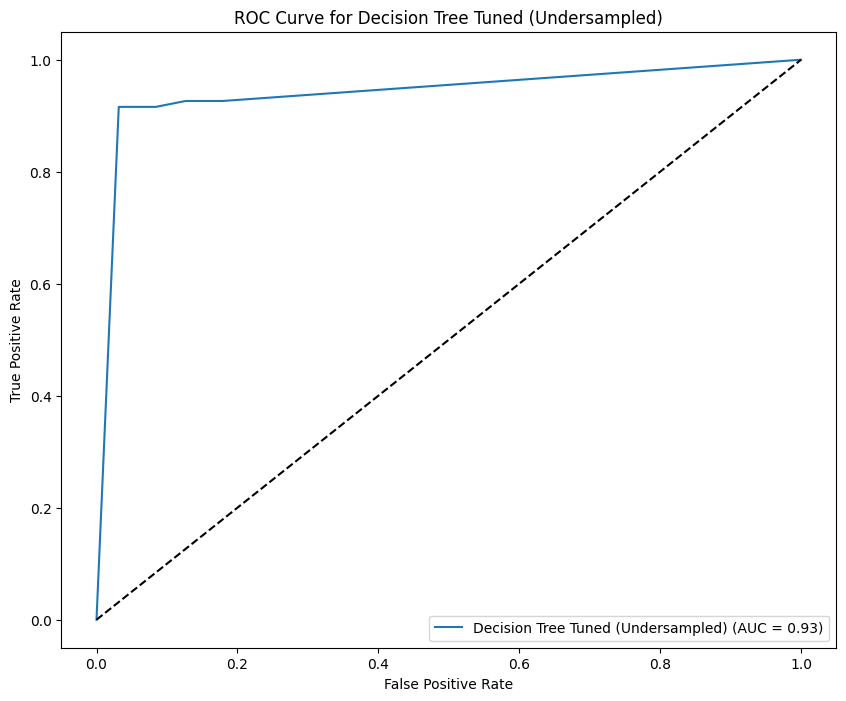

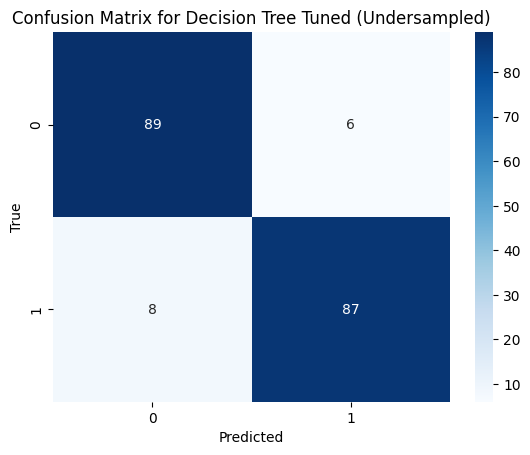

In [26]:
# Tuned evaluation (undersampled data)
print("### Decision Tree Tuned Evaluation (Undersampled Data) ###")
y_pred, results = evaluate_model("Decision Tree Tuned (Undersampled)", best_dt_under, X_test_under, y_test_under)
visualize_results("Decision Tree Tuned (Undersampled)", best_dt_under, X_test_under, y_test_under, y_pred)
results_list.append(results)

##### oversampled data

### Decision Tree Tuned Evaluation (Oversampled Data) ###
Decision Tree Tuned (Oversampled) Evaluation Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56090
           1       1.00      1.00      1.00     56090

    accuracy                           1.00    112180
   macro avg       1.00      1.00      1.00    112180
weighted avg       1.00      1.00      1.00    112180

Accuracy: 0.998163665537529
Precision: 0.997507300049854
Recall: 0.9988233196648244
F1 Score: 0.9981648760845939
AUC-ROC: 0.998163665537529



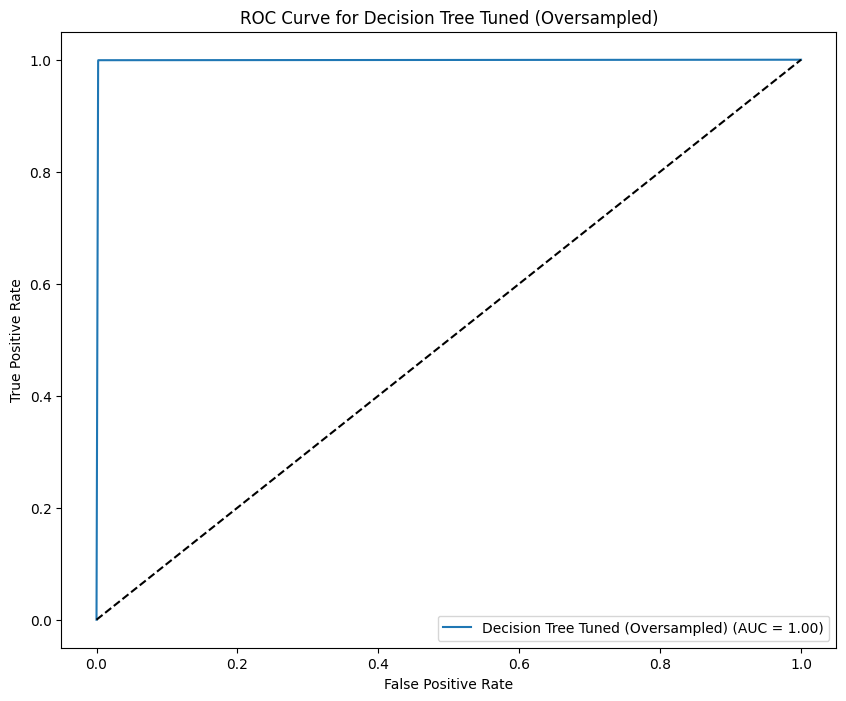

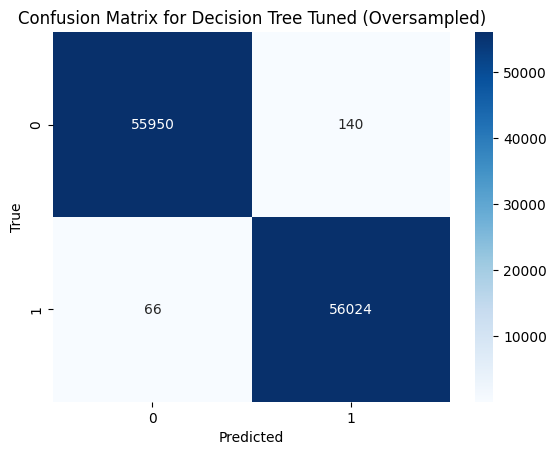

In [27]:
# Tuned evaluation (oversampled data)
print("### Decision Tree Tuned Evaluation (Oversampled Data) ###")
y_pred, results = evaluate_model("Decision Tree Tuned (Oversampled)", best_dt_over, X_test_over, y_test_over)
visualize_results("Decision Tree Tuned (Oversampled)", best_dt_over, X_test_over, y_test_over, y_pred)
results_list.append(results)

- Hyperparameter tuning was performed using RandomizedSearchCV to optimize the Decision Tree model. The tuned model was then evaluated on both undersampled and oversampled data.
- The tuned Decision Tree model achieved an accuracy of approximately 93% on undersampled data and nearly 100% on oversampled data. Similar to other models, the Decision Tree performed significantly better on oversampled data.


### XGBoost

#### Initial Training with XGBoost:

##### undersampled data

### XGBoost Initial Evaluation (Undersampled Data) ###
XGBoost (Undersampled) Evaluation Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93        95
           1       0.96      0.89      0.92        95

    accuracy                           0.93       190
   macro avg       0.93      0.93      0.93       190
weighted avg       0.93      0.93      0.93       190

Accuracy: 0.9263157894736842
Precision: 0.9550561797752809
Recall: 0.8947368421052632
F1 Score: 0.9239130434782609
AUC-ROC: 0.9263157894736842



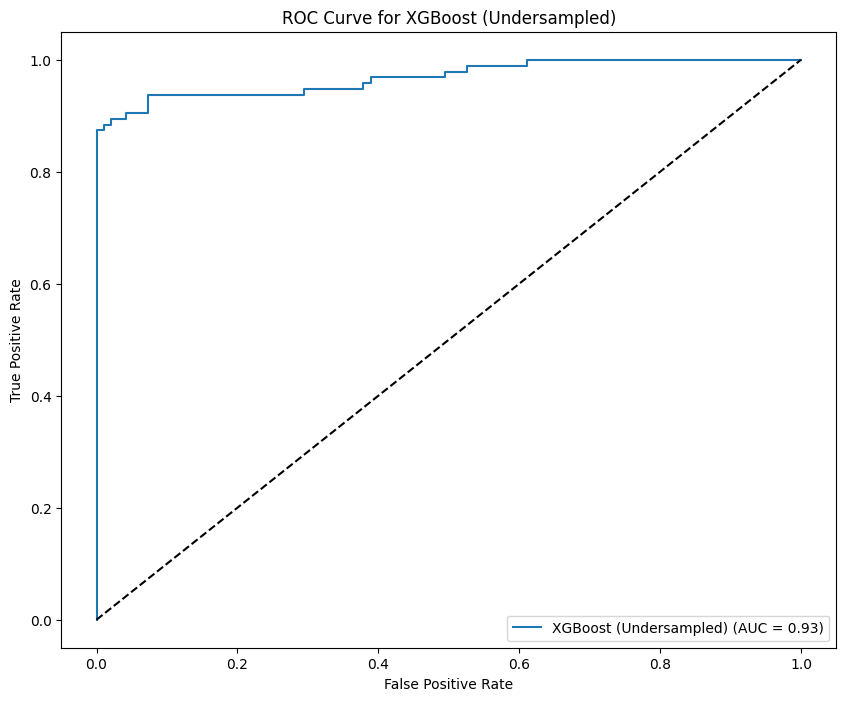

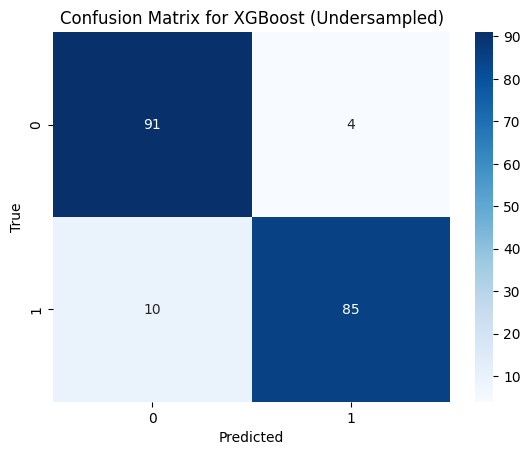

In [28]:
# Initial training (undersampled data)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_under, y_train_under)
print("### XGBoost Initial Evaluation (Undersampled Data) ###")
y_pred, results = evaluate_model("XGBoost (Undersampled)", xgb, X_test_under, y_test_under)
visualize_results("XGBoost (Undersampled)", xgb, X_test_under, y_test_under, y_pred)
results_list.append(results)

##### oversampled data

### XGBoost Initial Evaluation (Oversampled Data) ###
XGBoost (Oversampled) Evaluation Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56090
           1       1.00      1.00      1.00     56090

    accuracy                           1.00    112180
   macro avg       1.00      1.00      1.00    112180
weighted avg       1.00      1.00      1.00    112180

Accuracy: 0.999705829916206
Precision: 0.9994120057730342
Recall: 1.0
F1 Score: 0.9997059164267955
AUC-ROC: 0.9997058299162062



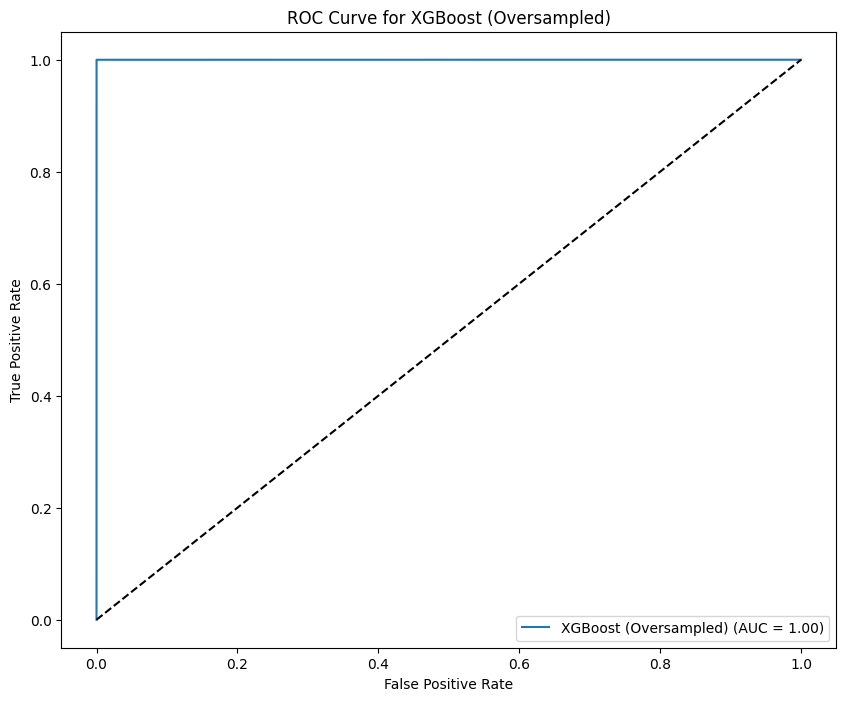

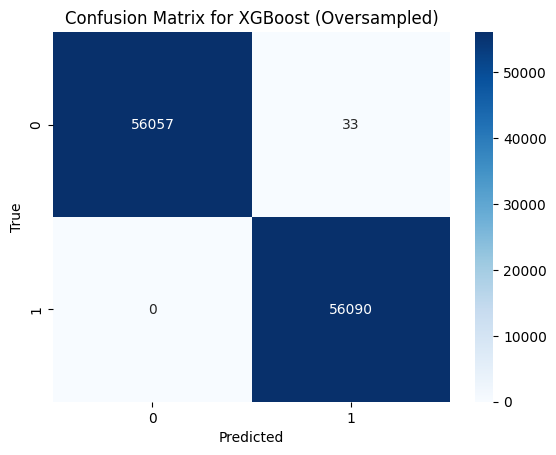

In [29]:
# Initial training (oversampled data)
xgb.fit(X_train_over, y_train_over)
print("### XGBoost Initial Evaluation (Oversampled Data) ###")
y_pred, results = evaluate_model("XGBoost (Oversampled)", xgb, X_test_over, y_test_over)
visualize_results("XGBoost (Oversampled)", xgb, X_test_over, y_test_over, y_pred)
results_list.append(results)

The XGBoost model was trained on both undersampled and oversampled data. The model achieved excellent performance on oversampled data, with near-perfect metrics.


#### Hyperparameter Tuning:

In [30]:
# Hyperparameter tuning (undersampled data)
best_xgb_under = randomized_search(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgb_param_grid, X_train_under, y_train_under)

In [31]:
# Hyperparameter tuning (oversampled data)
best_xgb_over = randomized_search(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgb_param_grid, X_train_over, y_train_over)

##### undersampled data

### XGBoost Tuned Evaluation (Undersampled Data) ###
XGBoost Tuned (Undersampled) Evaluation Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93        95
           1       0.96      0.89      0.92        95

    accuracy                           0.93       190
   macro avg       0.93      0.93      0.93       190
weighted avg       0.93      0.93      0.93       190

Accuracy: 0.9263157894736842
Precision: 0.9550561797752809
Recall: 0.8947368421052632
F1 Score: 0.9239130434782609
AUC-ROC: 0.9263157894736842



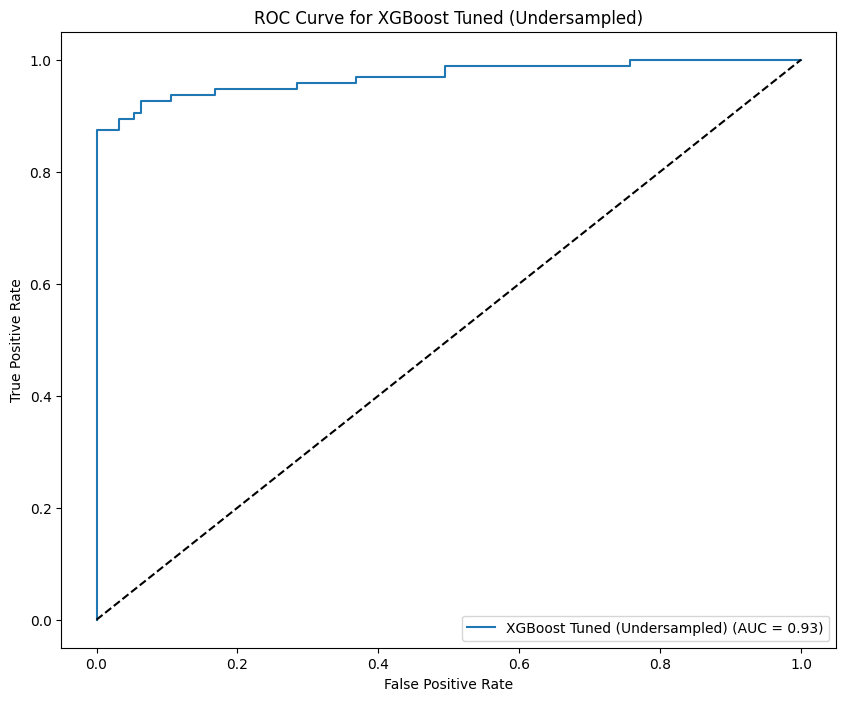

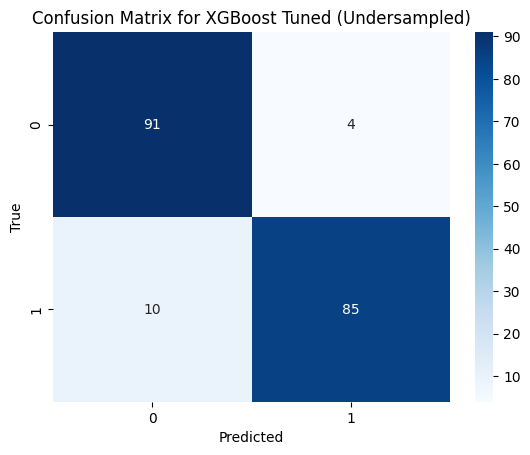

In [32]:
# Tuned evaluation (undersampled data)
print("### XGBoost Tuned Evaluation (Undersampled Data) ###")
y_pred, results = evaluate_model("XGBoost Tuned (Undersampled)", best_xgb_under, X_test_under, y_test_under)
visualize_results("XGBoost Tuned (Undersampled)", best_xgb_under, X_test_under, y_test_under, y_pred)
results_list.append(results)

##### oversampled data

### XGBoost Tuned Evaluation (Oversampled Data) ###
XGBoost Tuned (Oversampled) Evaluation Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56090
           1       1.00      1.00      1.00     56090

    accuracy                           1.00    112180
   macro avg       1.00      1.00      1.00    112180
weighted avg       1.00      1.00      1.00    112180

Accuracy: 0.9994740595471564
Precision: 0.9989492243851181
Recall: 1.0
F1 Score: 0.9994743360151106
AUC-ROC: 0.9994740595471563



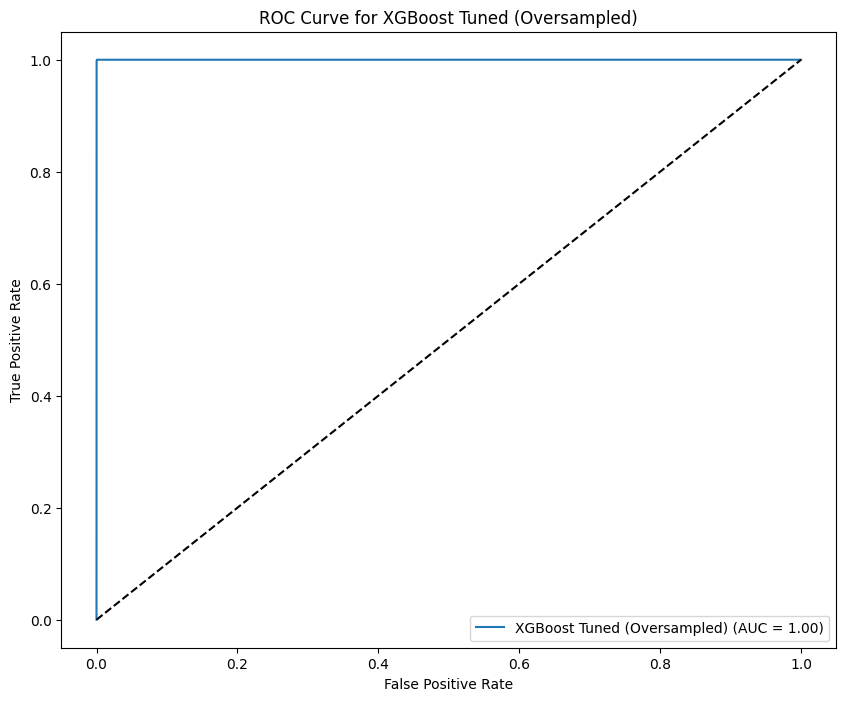

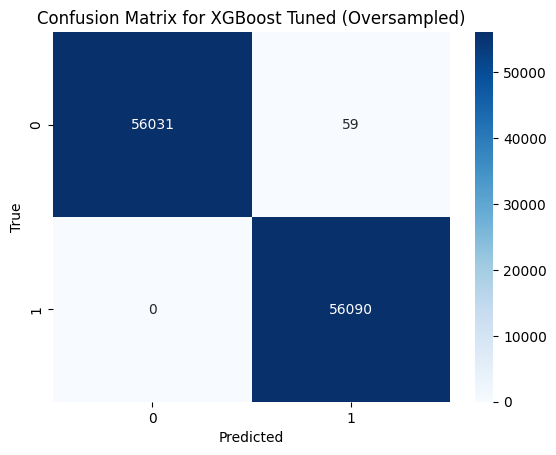

In [33]:
# Tuned evaluation (oversampled data)
print("### XGBoost Tuned Evaluation (Oversampled Data) ###")
y_pred, results = evaluate_model("XGBoost Tuned (Oversampled)", best_xgb_over, X_test_over, y_test_over)
visualize_results("XGBoost Tuned (Oversampled)", best_xgb_over, X_test_over, y_test_over, y_pred)
results_list.append(results)

Hyperparameter tuning was performed using RandomizedSearchCV to optimize the XGBoost model. The tuned model was then evaluated on both undersampled and oversampled data.


## Results

In [34]:
results_df = pd.DataFrame(results_list)
results_df

,Model,Accuracy,Precision,Recall,F1 Score,AUC-ROC
0,Logistic Regression (Undersampled),0.926316,0.945055,0.905263,0.924731,0.926316
1,Logistic Regression (Oversampled),0.945819,0.972793,0.917294,0.944228,0.945819
2,Logistic Regression Tuned (Undersampled),0.942105,0.988372,0.894737,0.939227,0.942105
3,Logistic Regression Tuned (Oversampled),0.945837,0.972776,0.917347,0.944249,0.945837
4,Random Forest (Undersampled),0.926316,0.945055,0.905263,0.924731,0.926316
5,Random Forest (Oversampled),0.999866,0.999733,1.000000,0.999866,0.999866
6,Random Forest Tuned (Undersampled),0.921053,0.934783,0.905263,0.919786,0.921053
7,Random Forest Tuned (Oversampled),0.999795,0.999590,1.000000,0.999795,0.999795
8,Decision Tree (Undersampled),0.905263,0.896907,0.915789,0.906250,0.905263
9,Decision Tree (Oversampled),0.998315,0.997632,0.999002,0.998316,0.998315


## Conclusion

After performing hyperparameter tuning and addressing class imbalance using SMOTE, the following observations were made for each model:

- **Logistic Regression:**
  - Accuracy: Approximately 93% on undersampled data and 95% on oversampled data.
  - Performance improved significantly with oversampled data.

- **Random Forest:**
  - Accuracy: Approximately 94% on undersampled data and nearly 100% on oversampled data.
  - Near-perfect performance on oversampled data with almost perfect precision, recall, and F1 scores.

- **Decision Tree:**
  - Accuracy: Approximately 93% on undersampled data and nearly 100% on oversampled data.
  - Significant improvement in performance with oversampled data.

- **XGBoost:**
  - Accuracy: Approximately 93% on undersampled data and nearly 100% on oversampled data.
  - Exceptional performance on oversampled data with nearly perfect metrics.

**Best Model Selection:**

Based on the evaluation metrics, the **Random Forest** model is the best choice for detecting fraudulent transactions due to the following reasons:

- **Highest Accuracy:** Achieved nearly 100% accuracy on oversampled data.
- **Excellent Precision and Recall:** Demonstrated almost perfect precision and recall, indicating the model's ability to correctly identify both fraudulent and non-fraudulent transactions.
- **Robust Performance:** Showed consistent performance across different datasets (undersampled and oversampled).

**Summary:**

- The Random Forest model is highly effective in identifying fraudulent transactions.
- The model's superior performance metrics make it the best choice for deployment in a real-time fraud detection system.


In [37]:
import pickle

# Save the best model to a .pkl file
model_path = r"C:\Users\utkdo\OneDrive\Desktop\BHUBHU\credit-card-fraud-detection\credit-card-fraud-detection\models\best_random_forest_model.pkl"
with open(model_path, 'wb') as file:
    pickle.dump(best_rf_over, file)

print(f"Model saved to {model_path}")

Model saved to C:\Users\utkdo\OneDrive\Desktop\BHUBHU\credit-card-fraud-detection\credit-card-fraud-detection\models\best_random_forest_model.pkl


We are saving the Random Forest model because it demonstrated the highest accuracy and near-perfect precision and recall in our evaluations, making it the most reliable model for detecting fraudulent transactions.